# Regression: EDA

### by

## Jeff Gross

based on SAS e-learning

In [17]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";

<img src="files/flow_chart.png">

<img src="files/EDA_1.png">

<img src="files/outlier.png">

<img src="files/outlier.png">

### Background: The BodyFat data set records the percentage of body fat, age, weight, height, and ten body circumference measurements (for example, abdomen) for 252 men.

### Task: Examine the distribution of the variables PctBodyFat2, Age, Weight, Height and the circumference measures (Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, and Wrist).

### Result: Weight, Height, and other measures seem to show high skewness and kurtosis. This might be due to a large outlier. One participant seems to be much heavier than the rest (> 300 pounds). Another—presumably not the same—seems to be abnormally short (about 30 inches).



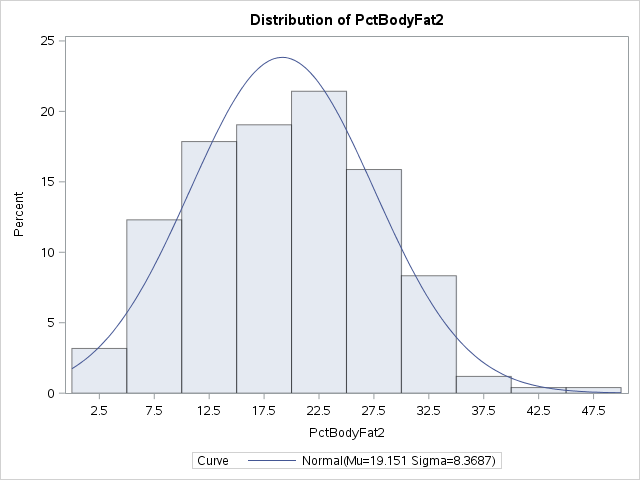
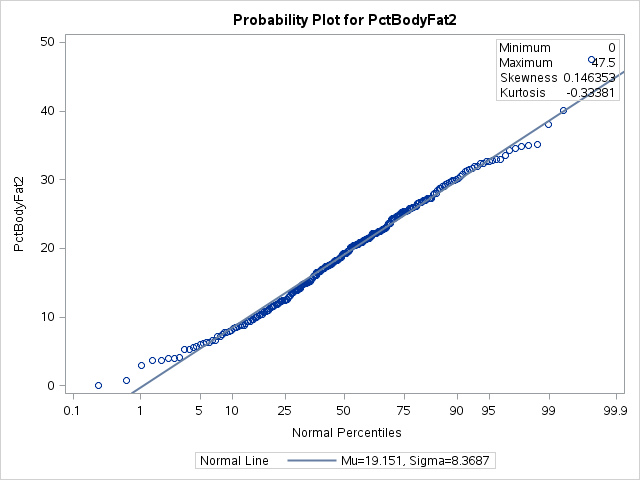
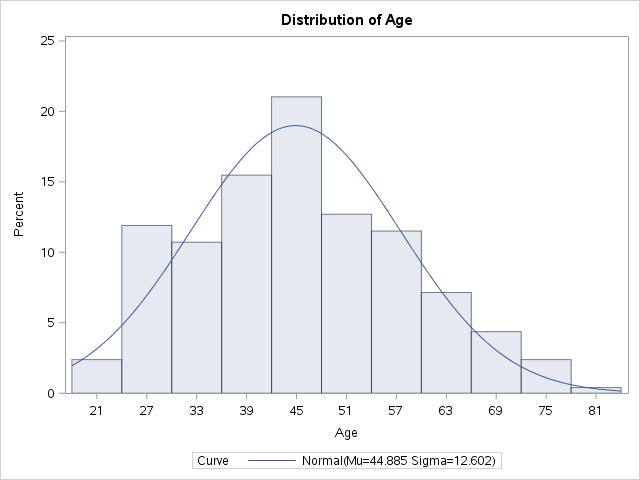
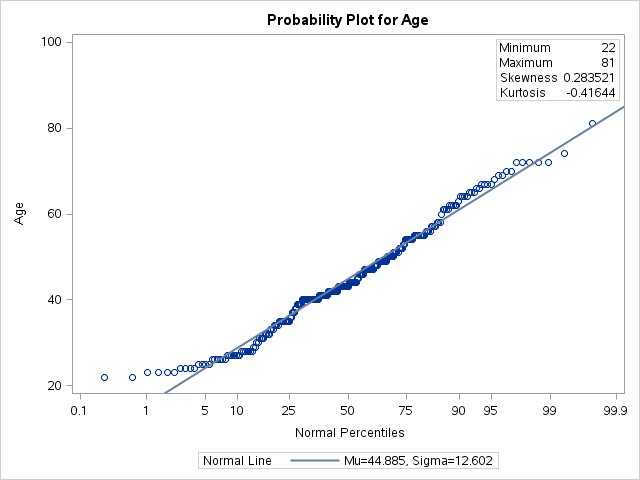
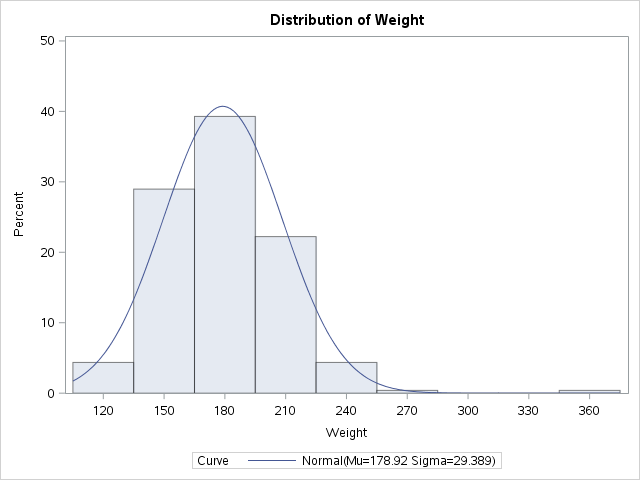
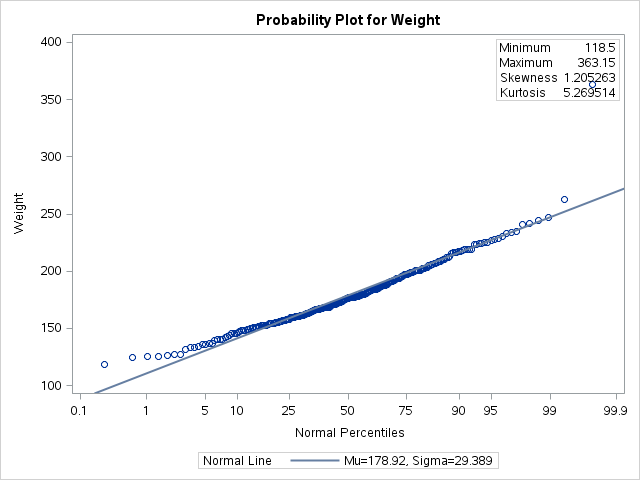
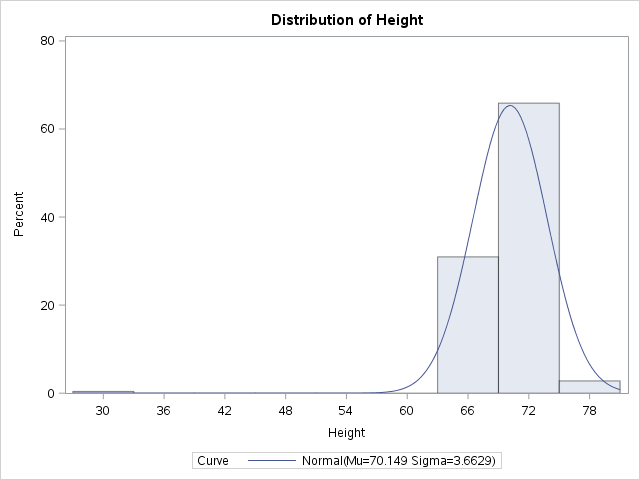
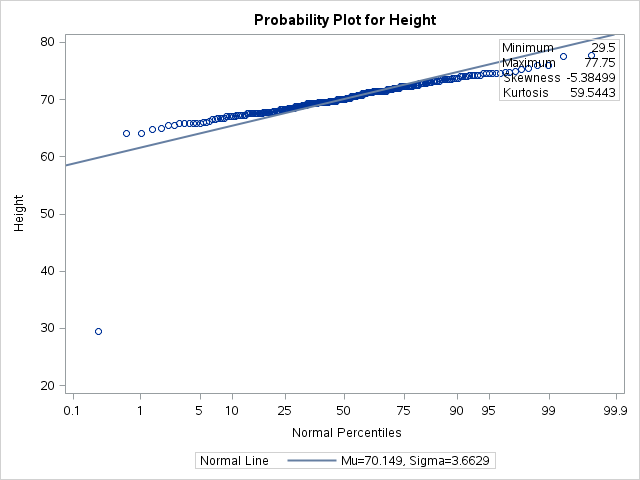
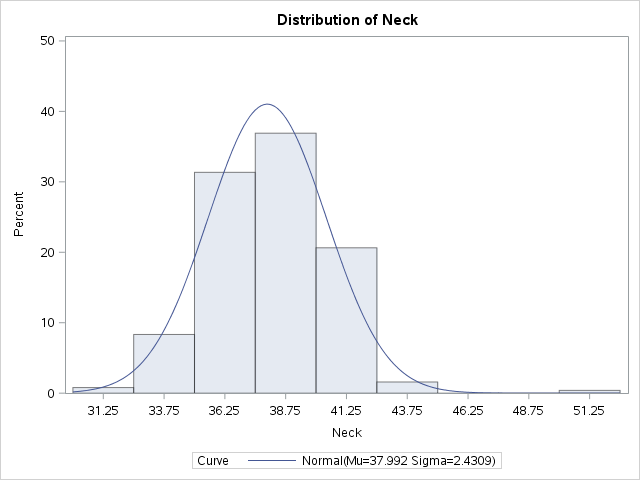
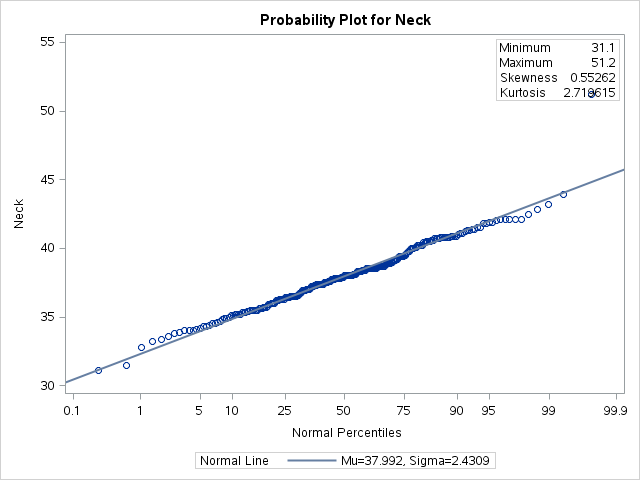
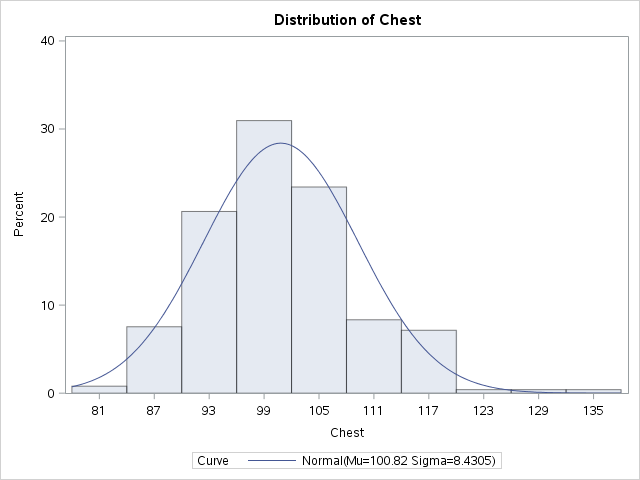
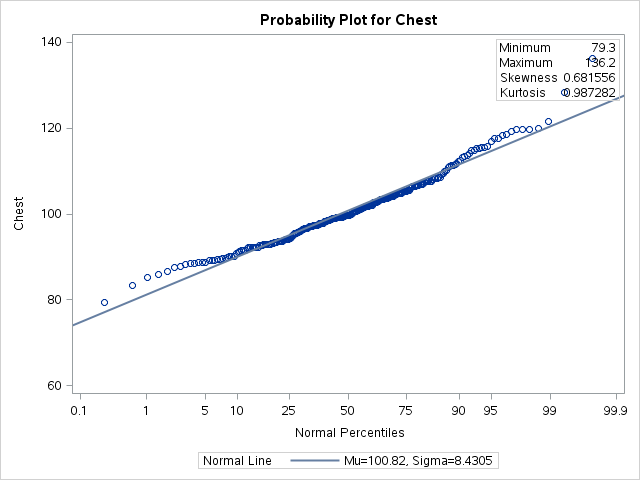
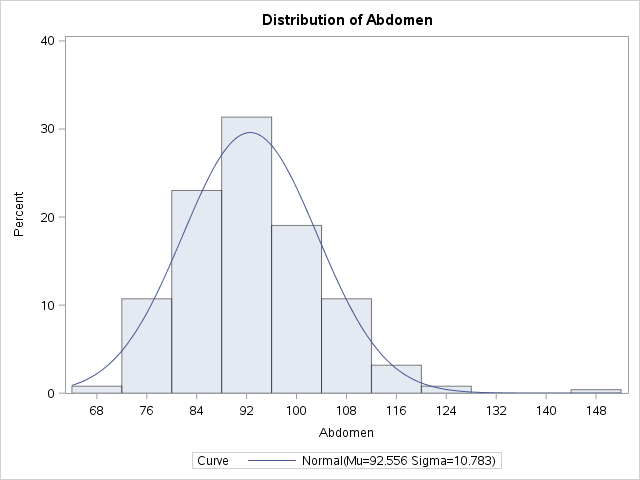
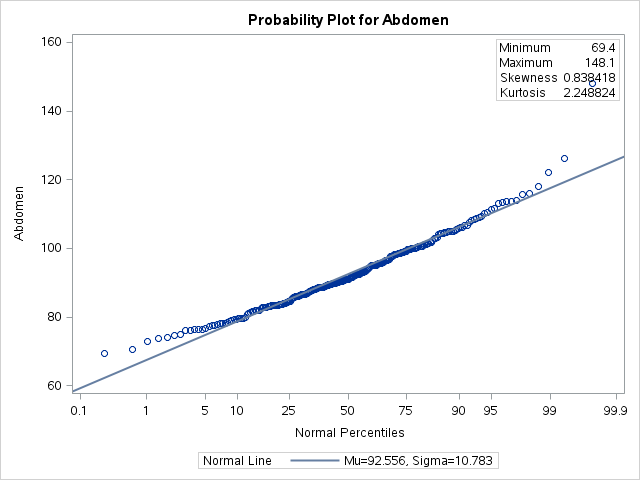
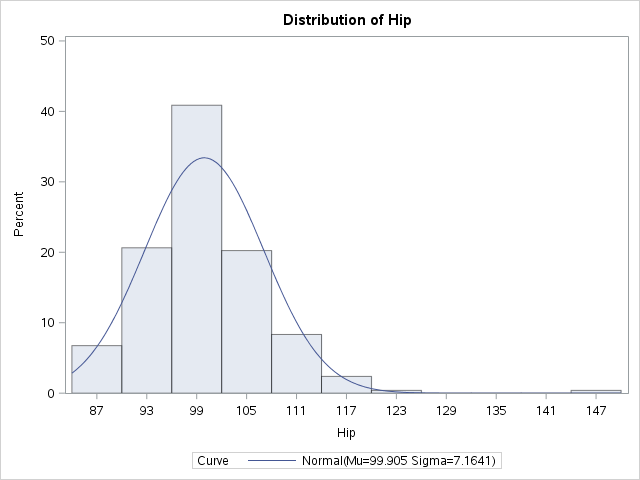
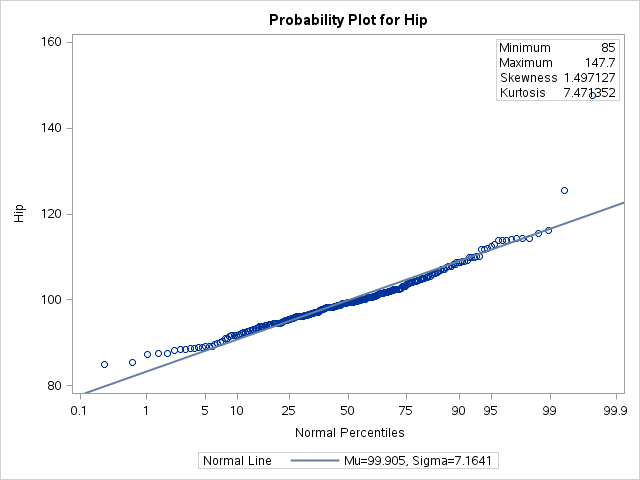
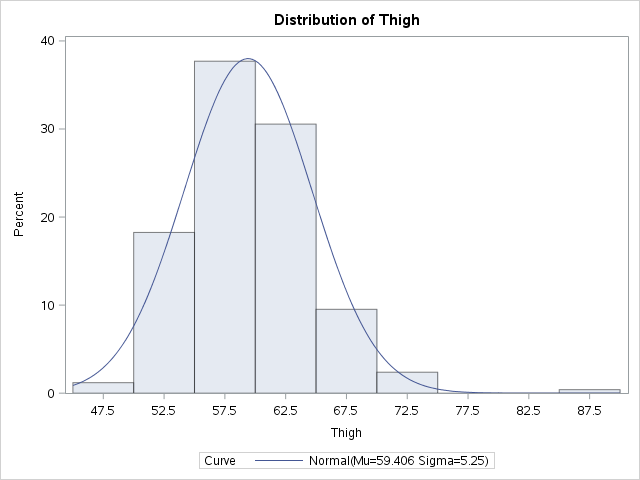
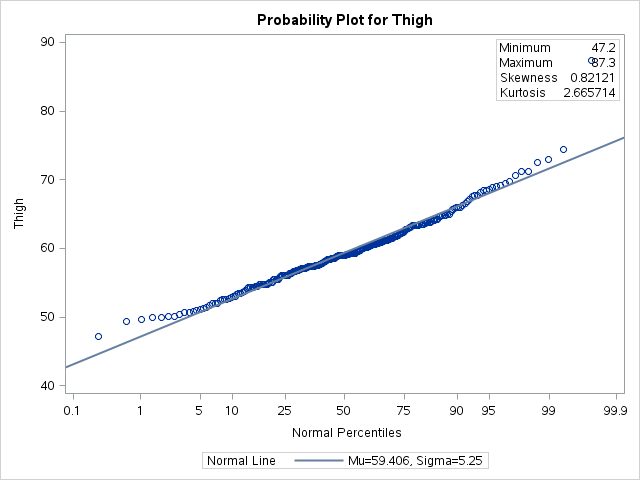
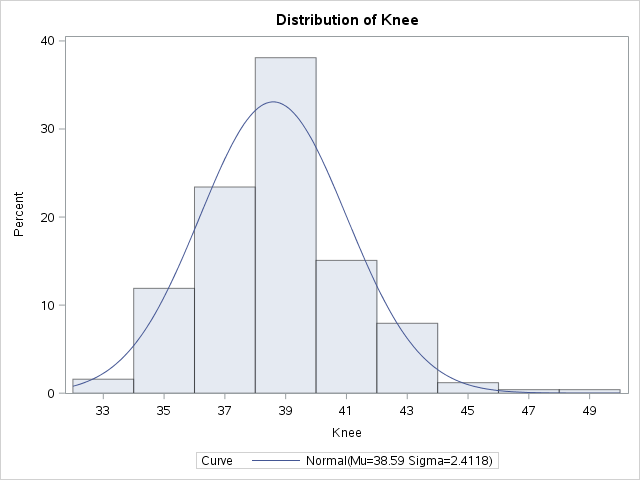
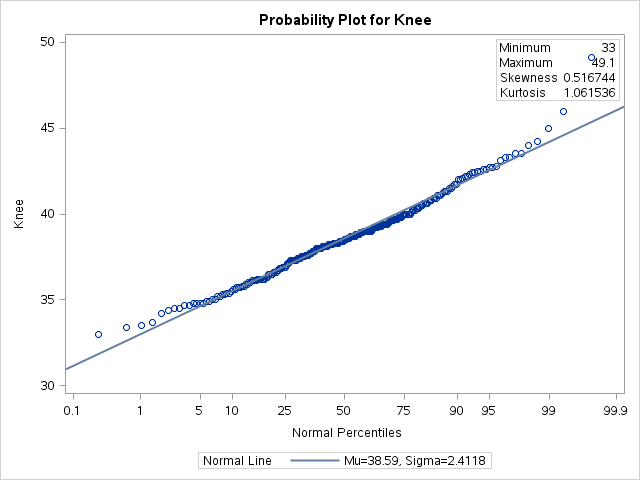
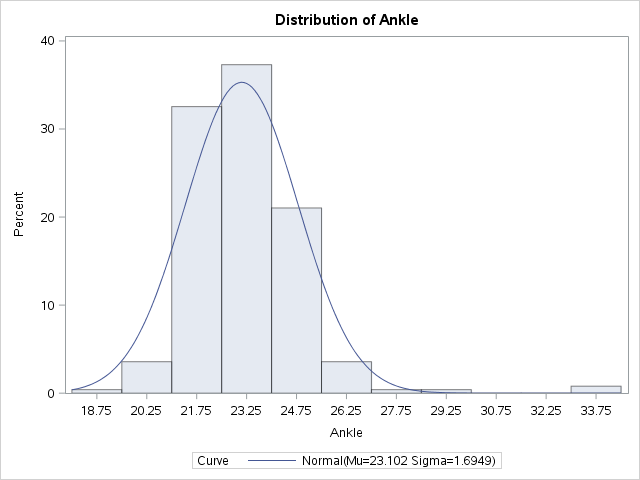
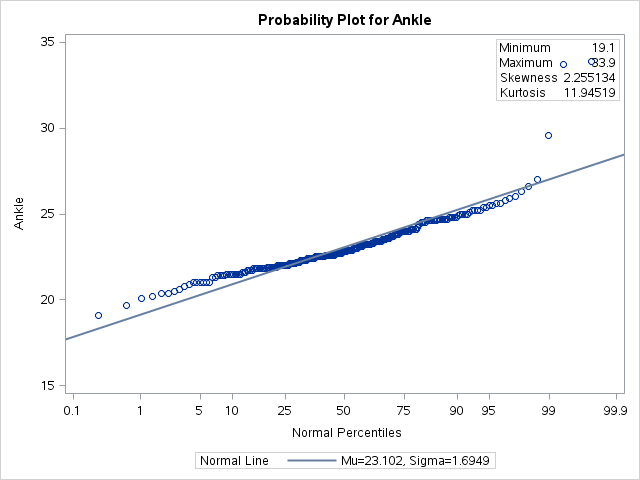
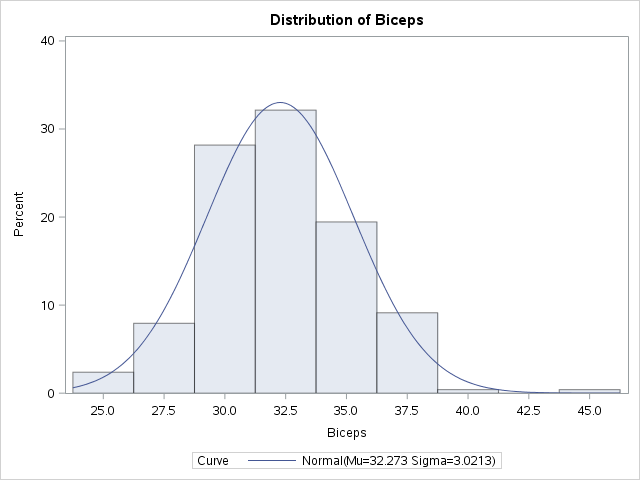
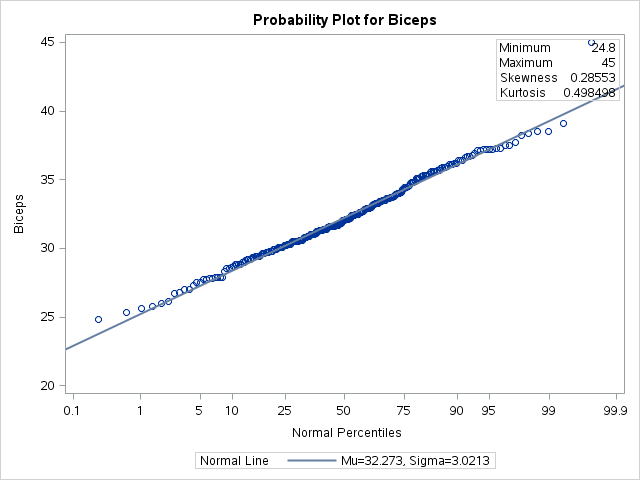
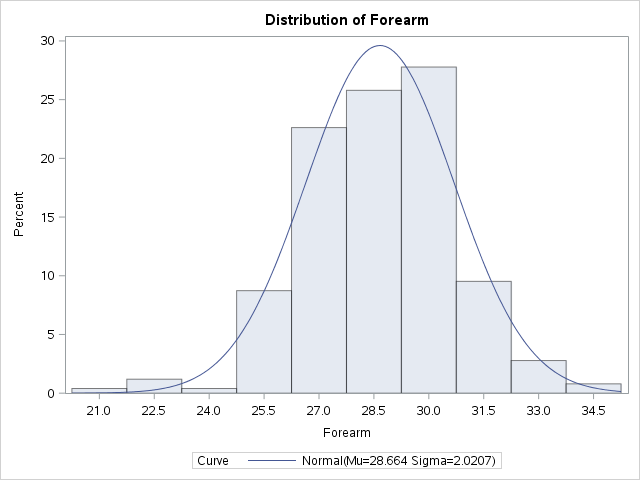
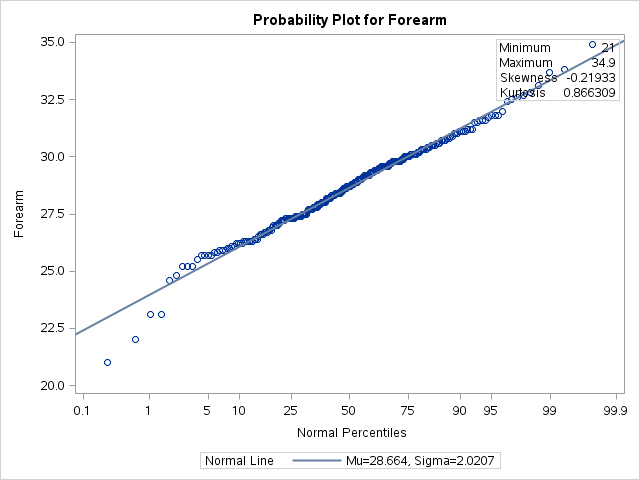
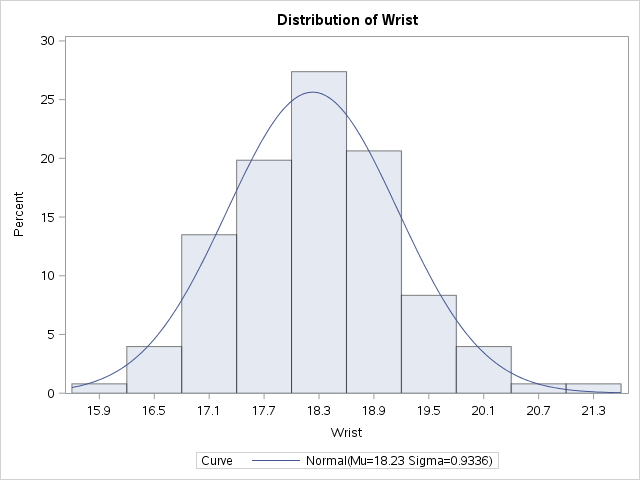
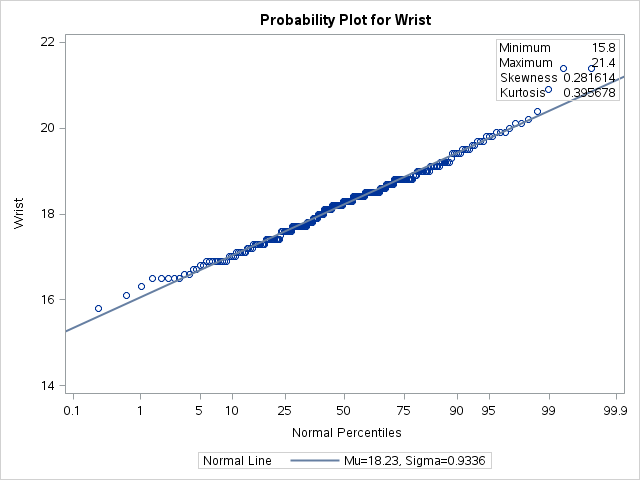

In [20]:
ods select histogram probplot;
proc univariate data=statdata.BodyFat;
   var PctBodyFat2 Age Weight Height
       Neck Chest Abdomen Hip Thigh
       Knee Ankle Biceps Forearm Wrist;
       histogram / normal (mu=est sigma=est);
   probplot / normal (mu=est sigma=est);
   inset min max skewness kurtosis / position=ne;
   title "Predictors of % Body Fat";
run;
title;

### Task: Generate scatter plots and correlations for the variables Age, Weight, Height with variable, PctBodyFat2.

### Result: Height seems to be the only variable that shows no real linear relationship. Age shows little linear trend. The Weight outlier is present again.


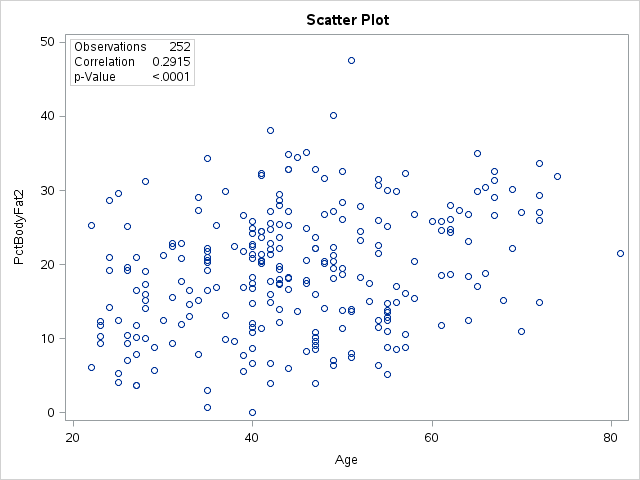
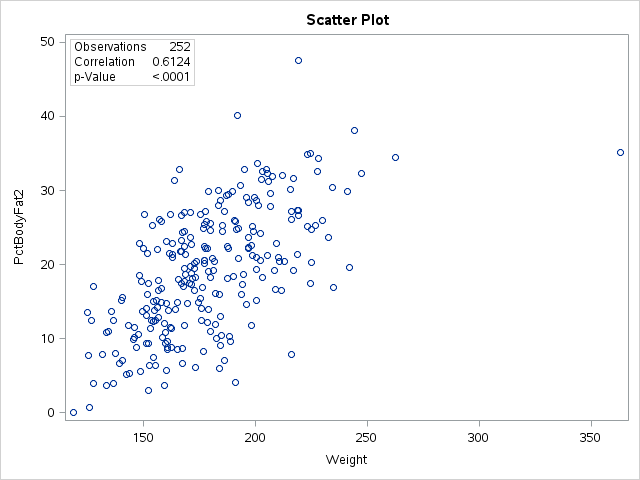
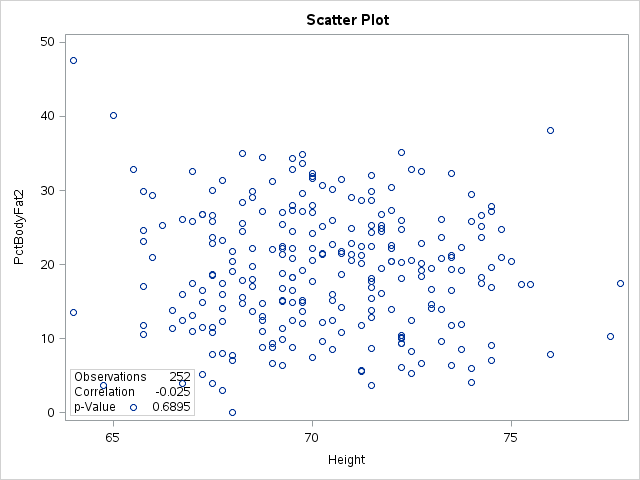

In [21]:
proc corr data=statdata.bodyfat2 rank
          plots(only)=scatter(nvar=all ellipse=none);
   var Age Weight Height;
   with PctBodyFat2;
   title "Correlations and Scatter Plots with Body Fat %";
run;
title:

### Task: Generate scatter plots and correlations for the circumference measures versus the with the variable, PctBodyFat2.

### Result: Age and Ankle show little linear relationship with PctBodyFat2. Neck, Abdomen, Hip, Knee, and Biceps oultiers are present. There are two outliers for Ankle. Abdomen, with 0.81343 is the variable with the highest correlation with PctBodyFat2.


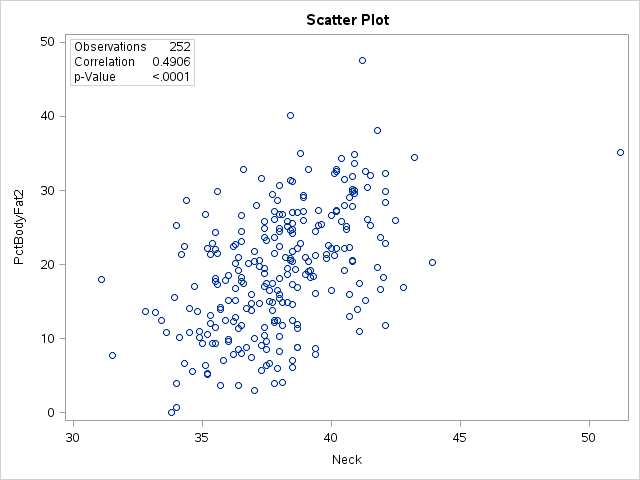
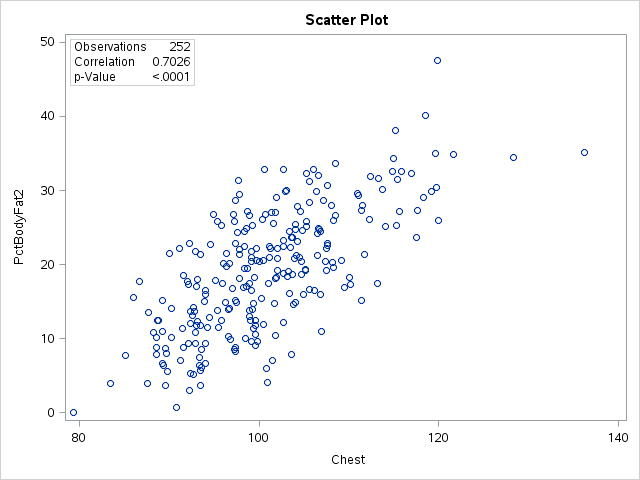
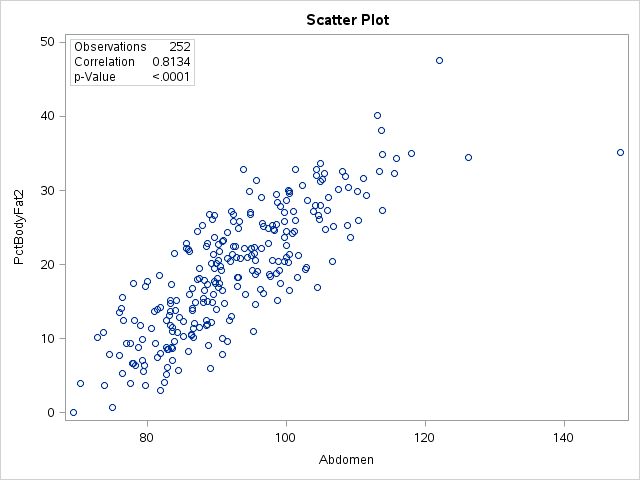
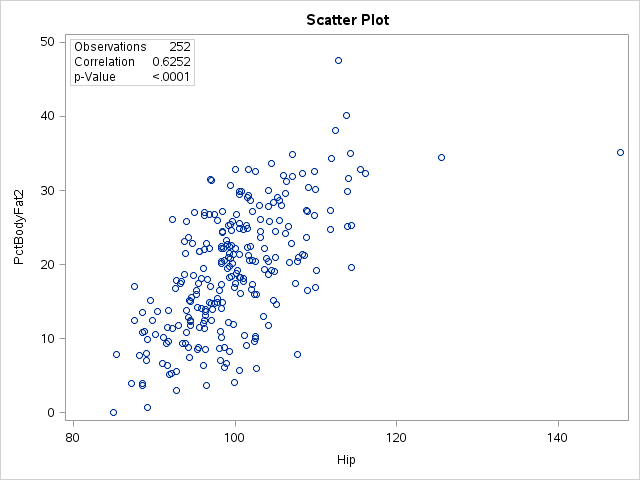
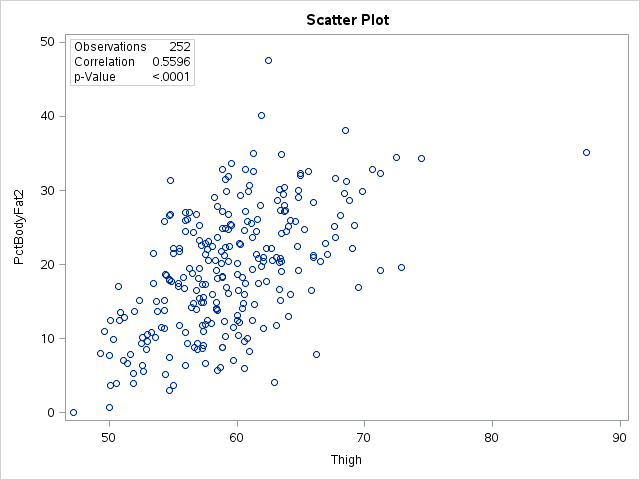
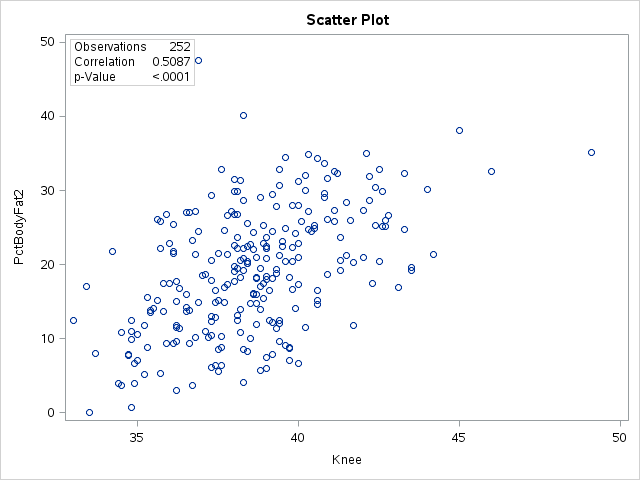
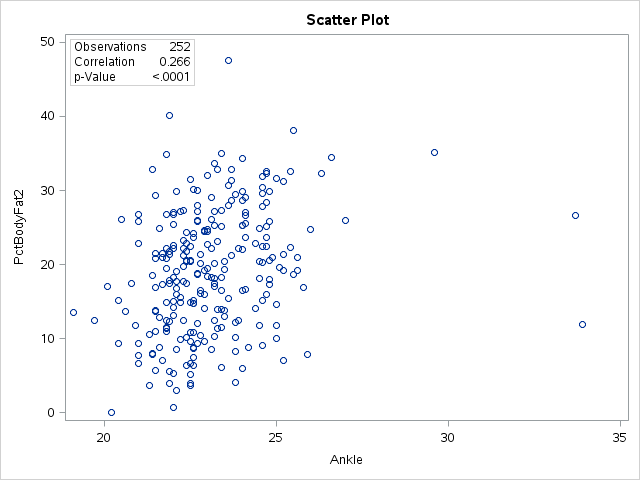
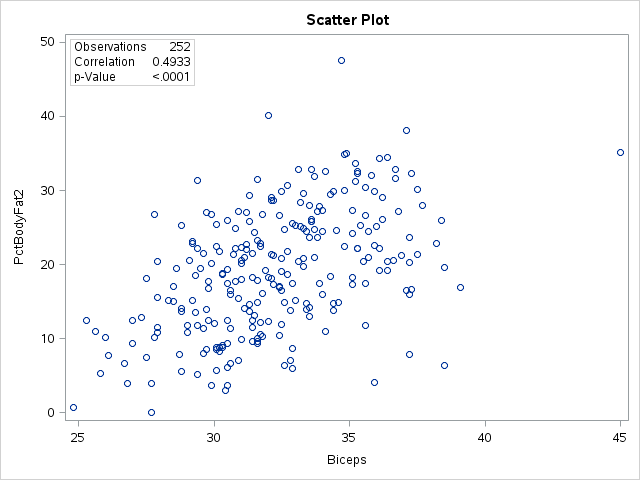
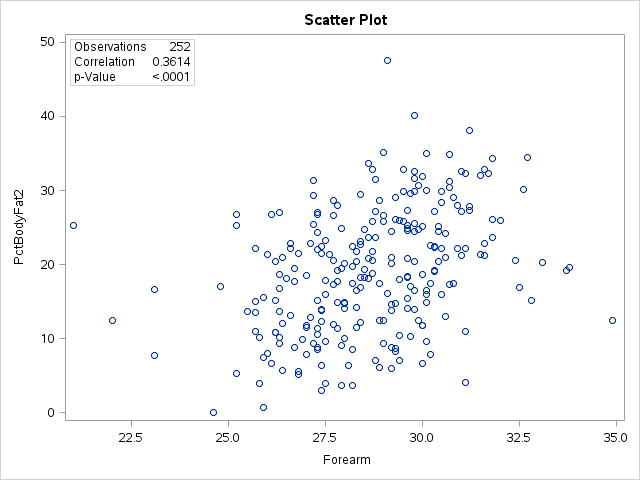
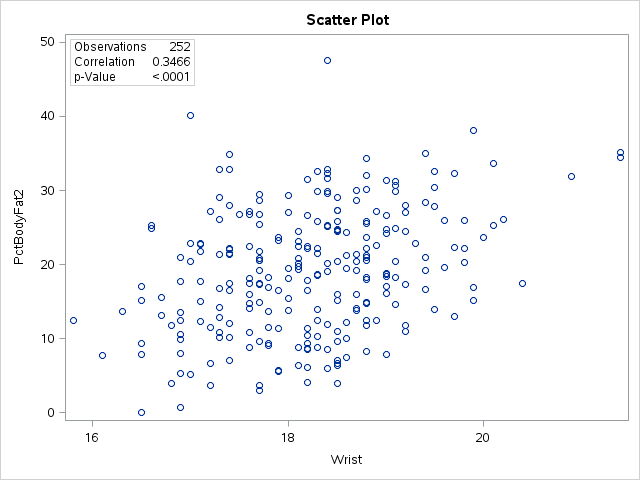

In [22]:
proc corr data=statdata.bodyfat2 rank
     plots(only)=scatter(nvar=all ellipse=none);
   var Neck Chest Abdomen Hip Thigh
       Knee Ankle Biceps Forearm Wrist;
   with PctBodyFat2;
   title "Correlations and Scatter Plots with Body Fat %";
run;
title;

### Task: Generate a correlation table and scatter plot matrix for the variables Age, Weight, Height, a correlation table for the circumference measures, and a correlation table and scatter plot matrix for the variables with the circumference measures.

### Result: Several relationships appear to have high correlations (such as those among Hip, Thigh, and Knee). Weight seems to correlate highly with all circumference variables.


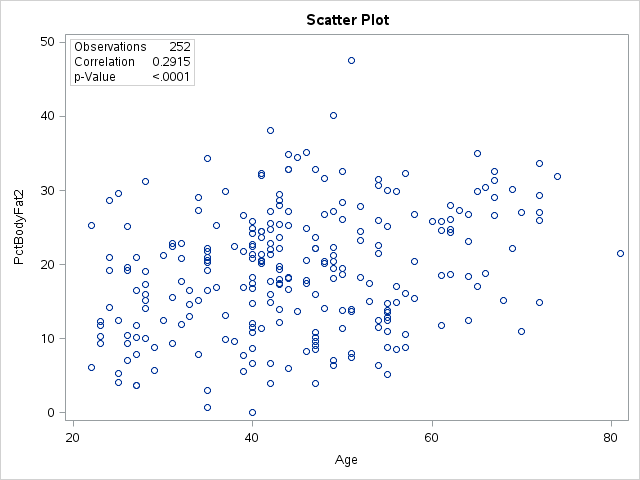
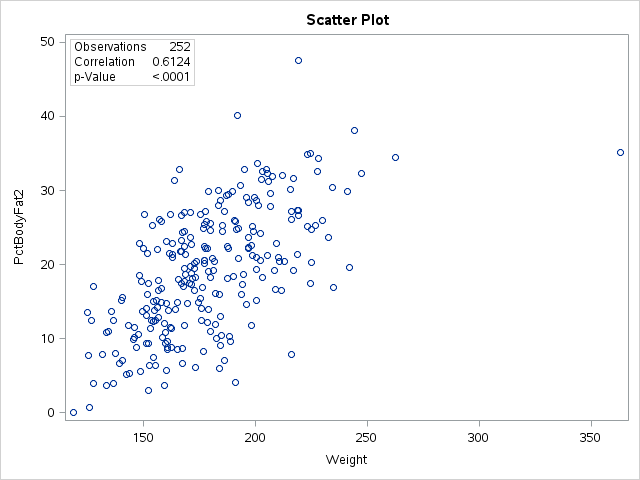
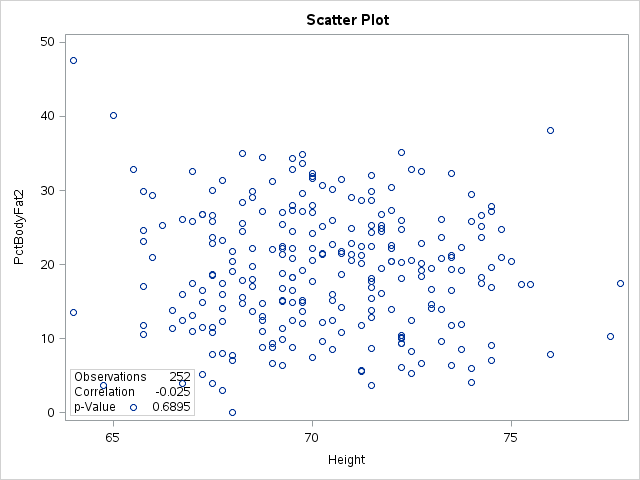

In [23]:
proc corr data=statdata.bodyfat2 rank
          plots(only)=scatter(nvar=all ellipse=none);
   var Age Weight Height;
   with PctBodyFat2;
   title "Correlations and Scatter Plots with Body Fat %";
run;


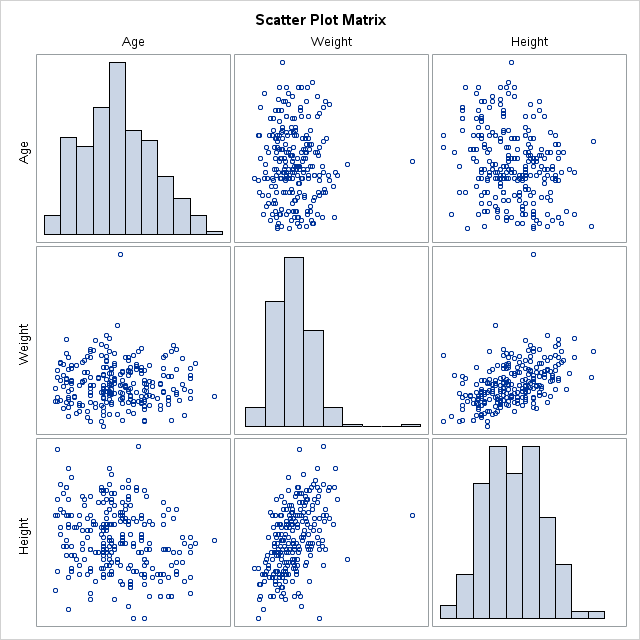

In [24]:
proc corr data=statdata.bodyfat2 nosimple
     plots=matrix(histogram);
   var Age Weight Height;
   title "Correlations and Scatter Plot Matrix of Basic Measures";
run;


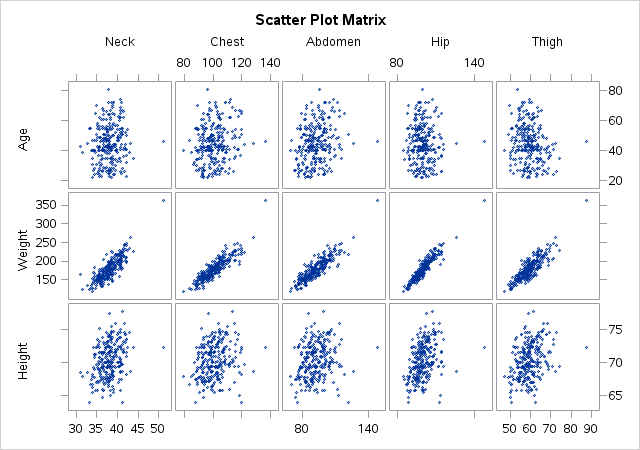

In [18]:
proc corr data=statdata.bodyfat2 nosimple plots=matrix;
   var Neck Chest Abdomen Hip Thigh
       Knee Ankle Biceps Forearm Wrist;
   with Age Weight Height;
   title "Correlations and Scatter Plot Matrix between";
   title2 "Basic Measures and Circumferences";
run;


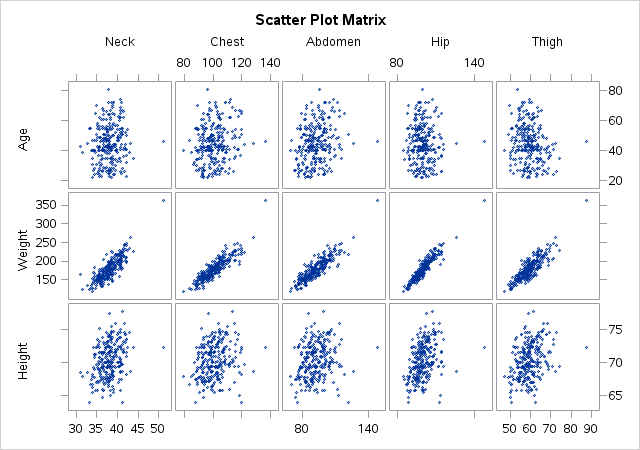

In [19]:
proc corr data=statdata.bodyfat2 nosimple
     plots=matrix;
   var Neck Chest Abdomen Hip Thigh
       Knee Ankle Biceps Forearm Wrist;
   with Age Weight Height;
   title "Correlations and Scatter Plot Matrix between";
   title2 "Basic Measures and Circumferences";
run;